# CNN with Embeddings

In this notebook I shall attempt to load the word embeddings from 10 different pickle files and feed them into a Convolutional Neural Network.

## Pseudocode

1. Load Pickle files and join into a single DataFrame / np.array

2. Define X and y

3. Fix dimensionality of the embeddings

4. Holdout 75 / 25

5. CNN

6. RNN

# Code

## Loading the Pickle files

In [40]:
import os
import pickle
import pandas as pd
import numpy as np
import re

In [18]:
nb_dir = os.path.split(os.path.abspath('__file__'))[0] # path to directory containing all notebooks

In [22]:
pickl_dir = os.path.join(nb_dir, '../pickle_files/') # path to directory containing the pickle files

In [44]:
# Walk directory and get all chunks, append to list
pickl_files = []
for root, dirs, files in os.walk(pickl_dir):
    for file in files:
        if 'chunk' in file: pickl_files.append(file)

pickl_files 

['embeddings_chunk_7.p',
 'embeddings_chunk_3.p',
 'embeddings_chunk_9.p',
 'embeddings_chunk_4.p',
 'embeddings_chunk_5.p',
 'embeddings_chunk_1.p',
 'embeddings_chunk_6.p',
 'embeddings_chunk_10.p',
 'embeddings_chunk_8.p',
 'embeddings_chunk_2.p']

In [47]:
# Sort files in ascending order
pickl_files.sort(key= lambda f: int(re.sub('\D', '', f)))
pickl_files

['embeddings_chunk_1.p',
 'embeddings_chunk_2.p',
 'embeddings_chunk_3.p',
 'embeddings_chunk_4.p',
 'embeddings_chunk_5.p',
 'embeddings_chunk_6.p',
 'embeddings_chunk_7.p',
 'embeddings_chunk_8.p',
 'embeddings_chunk_9.p',
 'embeddings_chunk_10.p']

In [58]:
# load pickle files and append content to df
df = pd.DataFrame()
for file_name in pickl_files:
    file = os.path.join(pickl_dir, file_name)
    with open(file, 'rb') as f:
        chunk = pickle.load(f)
        df = pd.concat([df, chunk])
    

In [61]:
df.head()

,review,work-balance,culture-values,career-opportunities,comp-benefits,senior-mgmt,overall,embedding
0,Best Company to work for People are smart and ...,4,5,5,4,5,5,"[0.0007951423, -0.00014201592, 0.02838342, 0.0..."
1,"Moving at the speed of light, burn out is inev...",2,3,3,5,3,5,"[-0.002623009, -0.0002024689, 0.0075852484, 0...."
2,Great balance between big-company security and...,5,4,5,5,4,5,"[-0.0007960695, -0.00020666199, 0.005231163, 0..."
3,The best place I've worked and also the most d...,2,5,5,4,5,4,"[0.0031662765, -0.00019514452, 0.007833832, 0...."
4,Execellent for engineers Impact driven. Best t...,5,5,5,5,5,4,"[0.0005778585, -0.0003066622, 0.026118364, 0.0..."


In [60]:
df.shape

(52383, 8)

## Define X and y

In [161]:
X = df.embedding
y = df.iloc[:, 1:-1]

In [162]:
X.head()

0    [0.0007951423, -0.00014201592, 0.02838342, 0.0...
1    [-0.002623009, -0.0002024689, 0.0075852484, 0....
2    [-0.0007960695, -0.00020666199, 0.005231163, 0...
3    [0.0031662765, -0.00019514452, 0.007833832, 0....
4    [0.0005778585, -0.0003066622, 0.026118364, 0.0...
Name: embedding, dtype: object

In [163]:
y.head()

,work-balance,culture-values,career-opportunities,comp-benefits,senior-mgmt,overall
0,4,5,5,4,5,5
1,2,3,3,5,3,5
2,5,4,5,5,4,5
3,2,5,5,4,5,4
4,5,5,5,5,5,4


## Fix dimensionality of the embeddings

Tensorflow won't recognise the arrays containing the embeddings, so we have to itereate over each row and append into a new array.

In [164]:
tmp = np.ndarray((len(X), len(X_train[0])))
for i in range(len(X)):
    tmp[i] = X[i]

In [165]:
X = tmp

## Holdout

In [166]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [167]:
X_train

array([[-3.47699295e-03, -1.55896152e-04, -3.50146252e-03, ...,
         1.39729712e-08, -1.59974519e-07, -4.00670171e-02],
       [-1.85498246e-03, -3.24994588e-04,  6.27304194e-03, ...,
         2.15741256e-08,  1.12282623e-06, -9.88112837e-02],
       [ 1.28782750e-03, -2.32360879e-04,  7.08759297e-03, ...,
         7.52142526e-08,  6.31478940e-08, -4.04303633e-02],
       ...,
       [-1.47636477e-02, -1.48427280e-04, -2.40473654e-02, ...,
         1.16361267e-08,  1.06964023e-06, -1.47934437e-01],
       [ 4.34585987e-03, -3.70991853e-04,  4.20658477e-03, ...,
         1.07337232e-08, -9.02294516e-07, -1.62203699e-01],
       [-1.82390539e-03, -2.17547364e-04,  2.70146993e-03, ...,
         2.97602796e-08, -1.98002795e-07, -1.12039559e-01]])

In [181]:
X_train[0].shape

(2048,)

In [133]:
from tensorflow.keras.backend import expand_dims

X_train = expand_dims(X_train, -1)
X_test = expand_dims(X_test, -1)

## Model

In [192]:
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping

In [196]:
es = EarlyStopping(patience=10, restore_best_weights=True)

In [195]:
output_dim = len(y.columns)
batch_size = 16
model = models.Sequential()
model.add(layers.Reshape((1, X[1].size), input_shape = X_train.shape[1:]))
model.add(layers.Conv1D(filters=300, kernel_size=1, strides = 5, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dropout(rate=0.3))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(output_dim, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=batch_size,
          validation_data=(X_test, y_test), epochs=100, callbacks=es)

Epoch 1/100
2292/2292 [==============================] - 20s 8ms/step - loss: 2698722.3864 - accuracy: 0.1425 - val_loss: 38379216.0000 - val_accuracy: 0.1542
Epoch 2/100
2292/2292 [==============================] - 27s 12ms/step - loss: 70731524.4954 - accuracy: 0.1403 - val_loss: 207222656.0000 - val_accuracy: 0.1542
Epoch 3/100
2292/2292 [==============================] - 23s 10ms/step - loss: 279313997.6973 - accuracy: 0.1436 - val_loss: 545766464.0000 - val_accuracy: 0.1542
Epoch 4/100
2292/2292 [==============================] - 18s 8ms/step - loss: 666257546.9132 - accuracy: 0.1461 - val_loss: 1052141952.0000 - val_accuracy: 0.1542
Epoch 5/100
2292/2292 [==============================] - 23s 10ms/step - loss: 1232653053.3485 - accuracy: 0.1492 - val_loss: 1802886144.0000 - val_accuracy: 0.1542
Epoch 6/100
2292/2292 [==============================] - 19s 8ms/step - loss: 2042793850.4178 - accuracy: 0.1518 - val_loss: 2792986112.0000 - val_accuracy: 0.1542
Epoch 7/100
2292/2292 [=

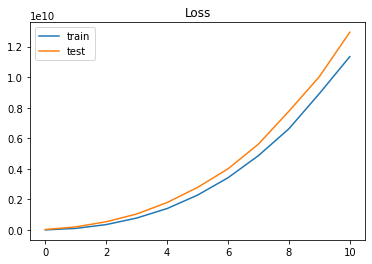

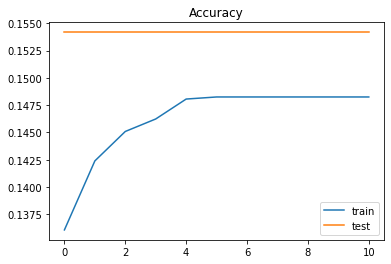

In [197]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Accuracy')
plt.legend()
plt.show()

In [207]:
output_dim = len(y.columns)
batch_size = 16
model = models.Sequential()
model.add(layers.Reshape((1, X[1].size), input_shape = X_train.shape[1:]))
model.add(layers.Conv1D(filters=50, kernel_size=1, strides = 5, activation='relu'))
model.add(layers.Conv1D(filters=30, kernel_size=1, strides = 5, activation='relu'))
model.add(layers.Conv1D(filters=20, kernel_size=1, strides = 5, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dropout(rate=0.3))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(output_dim, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=batch_size,
          validation_data=(X_test, y_test), epochs=100, callbacks=es)

Epoch 1/100
2292/2292 [==============================] - 9s 4ms/step - loss: 2416222647.4288 - accuracy: 0.2402 - val_loss: 75975163904.0000 - val_accuracy: 0.3097
Epoch 2/100
2292/2292 [==============================] - 8s 3ms/step - loss: 231757959834.2922 - accuracy: 0.3122 - val_loss: 1206653288448.0000 - val_accuracy: 0.3097
Epoch 3/100
2292/2292 [==============================] - 8s 3ms/step - loss: 1945598794800.6768 - accuracy: 0.3091 - val_loss: 5310099488768.0000 - val_accuracy: 0.3097
Epoch 4/100
2292/2292 [==============================] - 8s 4ms/step - loss: 7145462922649.5107 - accuracy: 0.3111 - val_loss: 14478680784896.0000 - val_accuracy: 0.3097
Epoch 5/100
2292/2292 [==============================] - 8s 3ms/step - loss: 18061195992705.7305 - accuracy: 0.3118 - val_loss: 31215461597184.0000 - val_accuracy: 0.3097
Epoch 6/100
2292/2292 [==============================] - 8s 3ms/step - loss: 38109788534016.7812 - accuracy: 0.3003 - val_loss: 62554105708544.0000 - val_accu

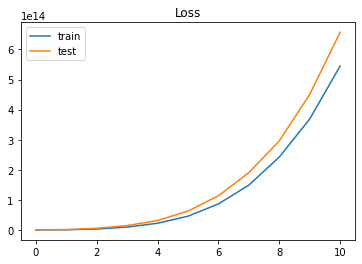

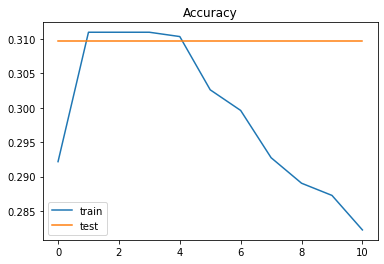

In [208]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Accuracy')
plt.legend()
plt.show()

In [211]:
output_dim = len(y.columns)
batch_size = 16
model = models.Sequential()
model.add(layers.Reshape((1, X[1].size), input_shape = X_train.shape[1:]))
model.add(layers.Conv1D(filters=100, kernel_size=1, strides = 5, activation='relu'))
model.add(layers.Conv1D(filters=80, kernel_size=1, strides = 5, activation='relu'))
model.add(layers.Conv1D(filters=60, kernel_size=1, strides = 5, activation='relu'))
model.add(layers.Conv1D(filters=40, kernel_size=1, strides = 5, activation='relu'))
model.add(layers.Conv1D(filters=20, kernel_size=1, strides = 5, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dropout(rate=0.3))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(output_dim, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=batch_size,
          validation_data=(X_test, y_test), epochs=100, callbacks=es)

Epoch 1/100
2292/2292 [==============================] - 12s 5ms/step - loss: 549948725658391.4375 - accuracy: 0.3088 - val_loss: 28307096508301312.0000 - val_accuracy: 0.3097
Epoch 2/100
2292/2292 [==============================] - 10s 5ms/step - loss: 152299258233459456.0000 - accuracy: 0.3147 - val_loss: 1272644027220492288.0000 - val_accuracy: 0.3097
Epoch 3/100
2292/2292 [==============================] - 11s 5ms/step - loss: 2592993458758530048.0000 - accuracy: 0.3105 - val_loss: 9675204245661417472.0000 - val_accuracy: 0.3097
Epoch 4/100
2292/2292 [==============================] - 11s 5ms/step - loss: 15107739682156066816.0000 - accuracy: 0.3167 - val_loss: 38827001335095754752.0000 - val_accuracy: 0.3097
Epoch 5/100
2292/2292 [==============================] - 11s 5ms/step - loss: nan - accuracy: 0.3253 - val_loss: nan - val_accuracy: 0.3677
Epoch 6/100
2292/2292 [==============================] - 11s 5ms/step - loss: nan - accuracy: 0.3731 - val_loss: nan - val_accuracy: 0.36

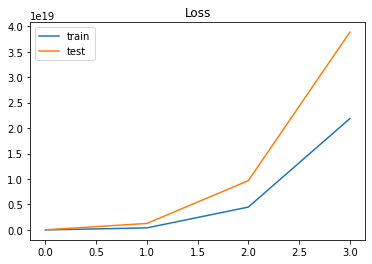

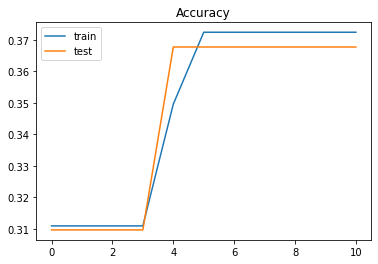

In [212]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Accuracy')
plt.legend()
plt.show()

## RNN

In [201]:
output_dim = len(y.columns)
batch_size = 16
model = models.Sequential()
model.add(layers.Reshape((1, X[1].size), input_shape = X_train.shape[1:]))
model.add(layers.LSTM(128))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dropout(rate=0.3))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(output_dim, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=batch_size,
          validation_data=(X_test, y_test), epochs=100, callbacks=es)

Epoch 1/100
2292/2292 [==============================] - 31s 13ms/step - loss: 11401.2788 - accuracy: 0.1056 - val_loss: 87093.9922 - val_accuracy: 0.0125
Epoch 2/100
2292/2292 [==============================] - 26s 11ms/step - loss: 127793.3662 - accuracy: 0.0659 - val_loss: 254981.1562 - val_accuracy: 0.0125
Epoch 3/100
2292/2292 [==============================] - 26s 11ms/step - loss: 299385.9057 - accuracy: 0.0689 - val_loss: 417214.4062 - val_accuracy: 0.0125
Epoch 4/100
2292/2292 [==============================] - 28s 12ms/step - loss: 458653.1946 - accuracy: 0.0707 - val_loss: 556675.0000 - val_accuracy: 0.1299
Epoch 5/100
2292/2292 [==============================] - 24s 11ms/step - loss: 595973.7366 - accuracy: 0.0682 - val_loss: 686814.0625 - val_accuracy: 0.1299
Epoch 6/100
2292/2292 [==============================] - 25s 11ms/step - loss: 727599.0521 - accuracy: 0.0683 - val_loss: 836654.8750 - val_accuracy: 0.1299
Epoch 7/100
2292/2292 [==============================] - 28s

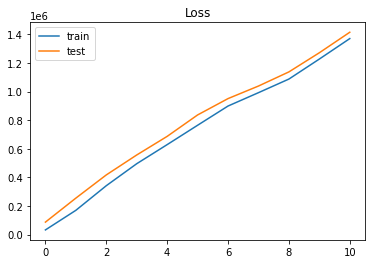

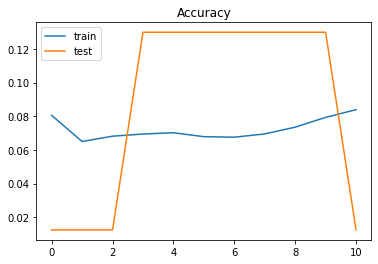

In [202]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Accuracy')
plt.legend()
plt.show()

## Biderectional RNN

In [205]:
output_dim = len(y.columns)
batch_size = 16
model = models.Sequential()
model.add(layers.Reshape((1, X[1].size), input_shape = X_train.shape[1:]))
model.add(layers.Bidirectional(layers.LSTM(64, return_sequences=True)))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dropout(rate=0.3))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(output_dim, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=batch_size,
          validation_data=(X_test, y_test), epochs=100, callbacks=es)

Epoch 1/100
2292/2292 [==============================] - 37s 13ms/step - loss: 19482.3692 - accuracy: 0.0281 - val_loss: 153155.4688 - val_accuracy: 0.0260
Epoch 2/100
2292/2292 [==============================] - 26s 12ms/step - loss: 223233.8321 - accuracy: 0.0275 - val_loss: 465507.3438 - val_accuracy: 0.0260
Epoch 3/100
2292/2292 [==============================] - 26s 11ms/step - loss: 560350.5805 - accuracy: 0.0278 - val_loss: 849411.1875 - val_accuracy: 0.0260
Epoch 4/100
2292/2292 [==============================] - 27s 12ms/step - loss: 959105.5565 - accuracy: 0.0282 - val_loss: 1277241.6250 - val_accuracy: 0.0260
Epoch 5/100
2292/2292 [==============================] - 28s 12ms/step - loss: 1409940.2508 - accuracy: 0.0273 - val_loss: 1755410.5000 - val_accuracy: 0.0260
Epoch 6/100
2292/2292 [==============================] - 27s 12ms/step - loss: 1884078.9905 - accuracy: 0.0291 - val_loss: 2258507.0000 - val_accuracy: 0.0260
Epoch 7/100
2292/2292 [==============================]

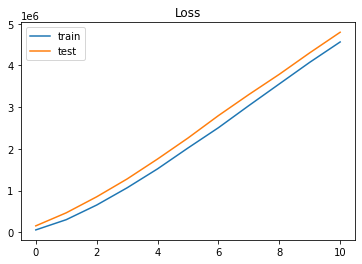

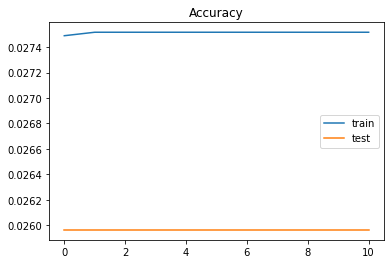

In [206]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Accuracy')
plt.legend()
plt.show()

## Simplifying Clases: negative, positve, neutral

In [217]:
mapping = {1:0,
           2:0,
           3:1,
           4:2,
           5:2}

In [230]:
y_encoded = y.copy()
for col in y_encoded.columns:
    y_encoded[col] = y_encoded[col].map(mapping)

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded,
                                                    test_size=0.3,
                                                    random_state=1)

In [236]:
output_dim = len(y.columns)
batch_size = 16
model = models.Sequential()
model.add(layers.Reshape((1, X[1].size), input_shape = X_train.shape[1:]))
model.add(layers.Conv1D(filters=100, kernel_size=1, strides = 5, activation='relu'))
model.add(layers.Conv1D(filters=80, kernel_size=1, strides = 5, activation='relu'))
model.add(layers.Conv1D(filters=60, kernel_size=1, strides = 5, activation='relu'))
model.add(layers.Conv1D(filters=40, kernel_size=1, strides = 5, activation='relu'))
model.add(layers.Conv1D(filters=20, kernel_size=1, strides = 5, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dropout(rate=0.3))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(output_dim, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=batch_size,
          validation_data=(X_test, y_test), epochs=100, callbacks=es)

Epoch 1/100
2292/2292 [==============================] - 13s 5ms/step - loss: 8007573238299.3428 - accuracy: 0.3448 - val_loss: 148915139641344.0000 - val_accuracy: 0.5481
Epoch 2/100
2292/2292 [==============================] - 11s 5ms/step - loss: 625712675416720.5000 - accuracy: 0.1645 - val_loss: 2384988091711488.0000 - val_accuracy: 0.0900
Epoch 3/100
2292/2292 [==============================] - 11s 5ms/step - loss: 7194479524931912.0000 - accuracy: 0.1386 - val_loss: 9477288793997312.0000 - val_accuracy: 0.0900
Epoch 4/100
2292/2292 [==============================] - 10s 4ms/step - loss: 36106832013787952.0000 - accuracy: 0.1289 - val_loss: 27645879850631168.0000 - val_accuracy: 0.5481
Epoch 5/100
2292/2292 [==============================] - 10s 5ms/step - loss: 114665766837600496.0000 - accuracy: 0.1323 - val_loss: 216336128309985280.0000 - val_accuracy: 0.0944
Epoch 6/100
2292/2292 [==============================] - 11s 5ms/step - loss: nan - accuracy: 0.2125 - val_loss: nan - 

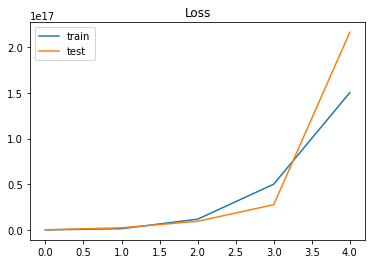

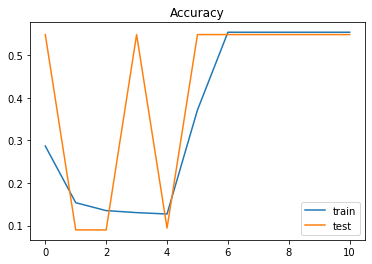

In [237]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Accuracy')
plt.legend()
plt.show()

In [238]:
from sklearn.linear_model import LogisticRegression

In [239]:
model = LogisticRegression()


In [245]:
scores_dic = {}
for score in y_train.columns:
    y_tmp = y_train[score]
    model = LogisticRegression(max_iter=5000)
    model.fit(X_train, y_tmp, )
    scores_dic[f'{score}'] = model.score(X_test, y_test[score])

In [246]:
scores_dic

{'work-balance': 0.5679923639834553,
 'culture-values': 0.6931594018453706,
 'career-opportunities': 0.6379255488386891,
 'comp-benefits': 0.7160038180082724,
 'senior-mgmt': 0.600890868596882,
 'overall': 0.5424753420299078}